It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.

In [38]:
from multiprocessing.spawn import import_main_path
from unicodedata import name
from unittest import skipUnless
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df = pd.read_csv("Book1.csv",names=['name','rollno','marks'])
df.head(20)

,name,rollno,marks
0,A,40,65
1,B,41,63
2,C,43,64
3,D,39,80
4,E,36,156
5,F,35,130
6,G,37,137
7,H,26,45
8,I,27,48
9,J,28,51


Text(0, 0.5, 'marks')

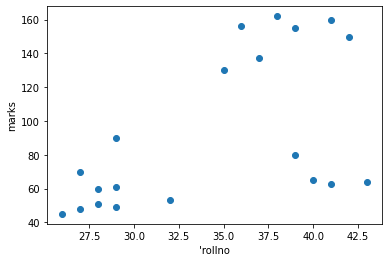

In [39]:
plt.scatter(df.rollno,df['marks'])
plt.xlabel("'rollno")
plt.ylabel("marks")
# there are 3 clusters 
# now i have to make 3 clusteres

In [40]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df[['rollno','marks']])
# fit_predict = fit + predict
predicted
# we can see here three clusters ,
# cluster 1 = 0
# cluster 2 = 1
# cluster 3 = 2

array([2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1])

In [41]:
df['cluster'] = predicted
# here i make new column
df.head(20)

,name,rollno,marks,cluster
0,A,40,65,2
1,B,41,63,2
2,C,43,64,2
3,D,39,80,2
4,E,36,156,1
5,F,35,130,1
6,G,37,137,1
7,H,26,45,0
8,I,27,48,0
9,J,28,51,0


Text(0, 0.5, 'marks')

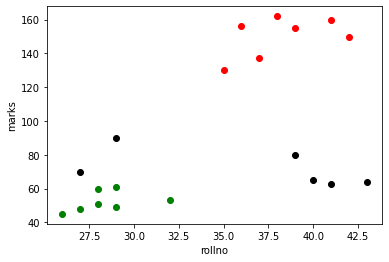

In [42]:
# here i make different datframes
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.rollno,df1.marks,color='green')
plt.scatter(df2.rollno,df2.marks,color='red')
plt.scatter(df3.rollno,df3.marks,color='black')

plt.xlabel("rollno")
plt.ylabel("marks")

# do clustets mix hi rahe hain, and thats not perfect and thats why we use MInMaxScaler to sabhi values lo ek range mei lanne ke liye 
# and sabhi value 0 and 1 ke beech mei aa jaeingii

In [43]:
scale = MinMaxScaler()

scale.fit(df[['marks']])
df['marks'] = scale.transform(df[['marks']])

scale.fit(df[['rollno']])
df['rollno'] = scale.transform(df[['rollno']])
df

,name,rollno,marks,cluster
0,A,0.823529,0.170940,2
1,B,0.882353,0.153846,2
2,C,1.000000,0.162393,2
3,D,0.764706,0.299145,2
4,E,0.588235,0.948718,1
5,F,0.529412,0.726496,1
6,G,0.647059,0.786325,1
7,H,0.000000,0.000000,0
8,I,0.058824,0.025641,0
9,J,0.117647,0.051282,0


In [44]:
km = KMeans(n_clusters=3)
km.fit(df[['rollno','marks']])
predicted = km.predict(df[['rollno','marks']])
predicted

array([2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [45]:
df = df.drop(['cluster'],axis = 'columns')
# column drop ho jaega
df['cluster'] = predicted
df.head(20)

,name,rollno,marks,cluster
0,A,0.823529,0.170940,2
1,B,0.882353,0.153846,2
2,C,1.000000,0.162393,2
3,D,0.764706,0.299145,2
4,E,0.588235,0.948718,1
5,F,0.529412,0.726496,1
6,G,0.647059,0.786325,1
7,H,0.000000,0.000000,0
8,I,0.058824,0.025641,0
9,J,0.117647,0.051282,0


Text(0, 0.5, 'marks')

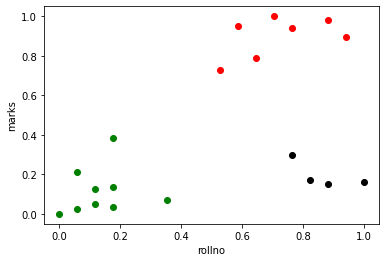

In [46]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.rollno,df1.marks,color='green')
plt.scatter(df2.rollno,df2.marks,color='red')
plt.scatter(df3.rollno,df3.marks,color='black')

plt.xlabel("rollno")
plt.ylabel("marks")

In [47]:
km.cluster_centers_
# rollno,marks 
# teeno clusters ke centroid mil jaeinge 

array([[0.1372549 , 0.11585945],
       [0.72268908, 0.8974359 ],
       [0.86764706, 0.1965812 ]])